# Anomaly Detection using Clustering

This lab is to perform anomaly detection for bank transaction dataset from the dataset in [Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data) and [notebook](https://www.kaggle.com/code/valakhorasani/fraud-detection-eda-and-model).

We will learn how to use clustering to determine bank transactions that are fraudulent.

## Transport Use Cases Leveraging Unsupervised Machine Learning for Public Transportation

Unsupervised machine learning, with its ability to find hidden patterns and structures in unlabeled data, offers valuable solutions for optimizing public transportation systems. Here are some impactful use cases:

**1. Route Optimization:**

* **Problem:** Designing efficient routes that minimize travel time, fuel consumption, and operational costs while maximizing coverage.
* **Solution:** Apply clustering algorithms to identify natural groupings of passenger origins and destinations. This reveals travel patterns and demand hotspots, enabling the design of routes that better serve passenger needs and optimize resource allocation.

**2. Passenger Segmentation:**

* **Problem:** Understanding diverse passenger groups with varying travel behaviors and needs for targeted service improvements.
* **Solution:** Utilize clustering algorithms on passenger data (demographics, trip history, fare types) to segment passengers into distinct groups. This allows for personalized recommendations, targeted marketing campaigns, and customized service offerings.

**3. Anomaly Detection:**

* **Problem:** Identifying unusual events or patterns in transportation systems that may indicate potential issues or disruptions.
* **Solution:** Employ anomaly detection algorithms on operational data (vehicle speed, location, passenger flow) to detect deviations from normal behavior. This could reveal mechanical issues, unexpected delays, or unusual passenger activity, enabling proactive intervention.

**4. Predictive Maintenance:**

* **Problem:** Minimizing vehicle downtime and maintenance costs by predicting potential failures before they occur.
* **Solution:** Apply clustering and anomaly detection algorithms on sensor data from vehicles (vibration, temperature, engine performance) to identify patterns indicative of impending failures. This allows for proactive maintenance scheduling and prevents costly breakdowns.

**5. Dynamic Pricing:**

* **Problem:** Optimizing fare structures to balance revenue generation with passenger affordability and demand management.
* **Solution:** Use clustering algorithms to group similar trips based on factors like distance, time of day, and demand. This enables dynamic pricing strategies that adjust fares in real-time based on demand and passenger behavior.

**6. Network Analysis:**

* **Problem:** Understanding the complex relationships and dependencies within a transportation network to identify vulnerabilities and optimize performance.
* **Solution:** Employ network analysis algorithms on route maps, passenger flow data, and real-time traffic information to identify critical nodes, bottlenecks, and potential points of failure. This informs infrastructure planning and resilience strategies.

**7. Service Quality Improvement:**

* **Problem:** Identifying areas for improvement in service quality based on passenger behavior and operational data.
* **Solution:** Utilize association rule mining to discover relationships between passenger complaints, service disruptions, and operational factors. This reveals hidden patterns and root causes of service issues, enabling targeted improvements.


These examples illustrate how unsupervised machine learning can extract valuable insights from raw data, facilitating data-driven decision-making and leading to more efficient, reliable, and passenger-centric public transportation systems.


## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("bank_transactions_data_2.csv")

In [3]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


## General Overview

In [4]:
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst Few Rows:\n", df.head())
print("\nDescriptive Statistics:\n", df.describe())

Dataset Shape: (2512, 16)

Column Data Types:
 TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Missing Values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDu

### Check Unique Value Counts for Key Identifiers

In [5]:
print("\nUnique Accounts:", df['AccountID'].nunique())
print("Unique Devices:", df['DeviceID'].nunique())
print("Unique Locations:", df['Location'].nunique())
print("Unique Merchants:", df['MerchantID'].nunique())


Unique Accounts: 495
Unique Devices: 681
Unique Locations: 43
Unique Merchants: 100


## Exploratory Data Analysis

### Transaction Amount Distribution

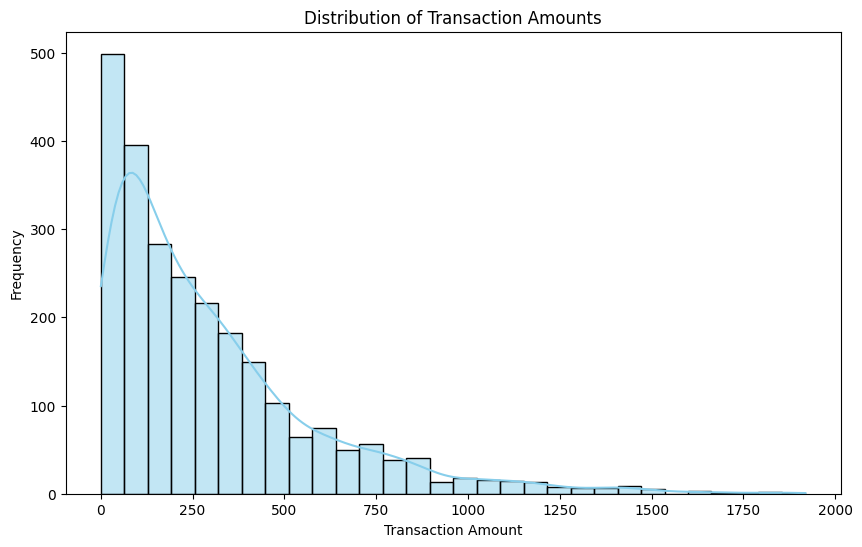

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


### Distribution of Transaction Types

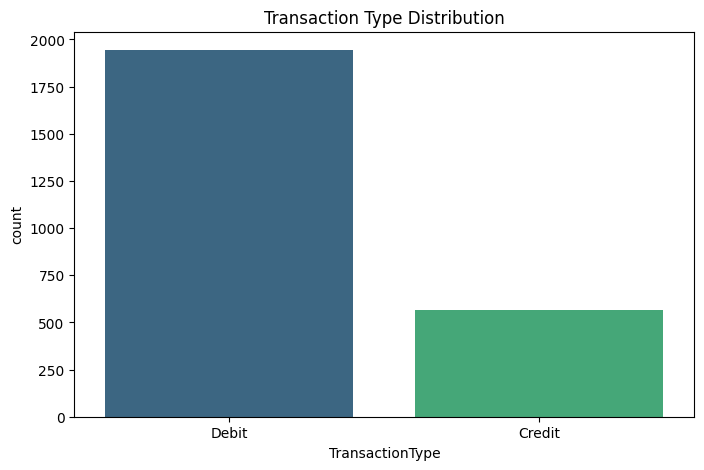

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionType', palette='viridis')
plt.title("Transaction Type Distribution")
plt.show()

### Transaction Amount Distribution and Outliers

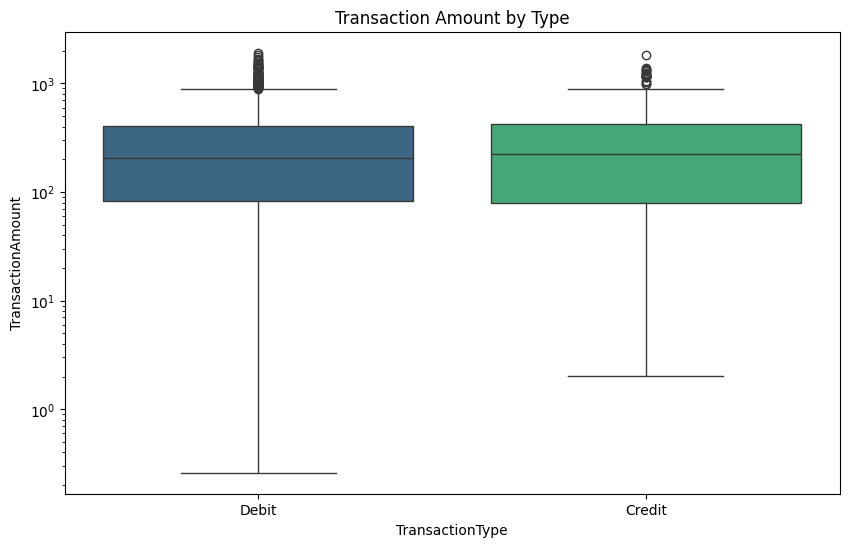

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', palette='viridis')
plt.yscale('log')  # Log scale to show outliers
plt.title("Transaction Amount by Type")
plt.show()

### Transaction Amount by Age Group (Customer Demographics)

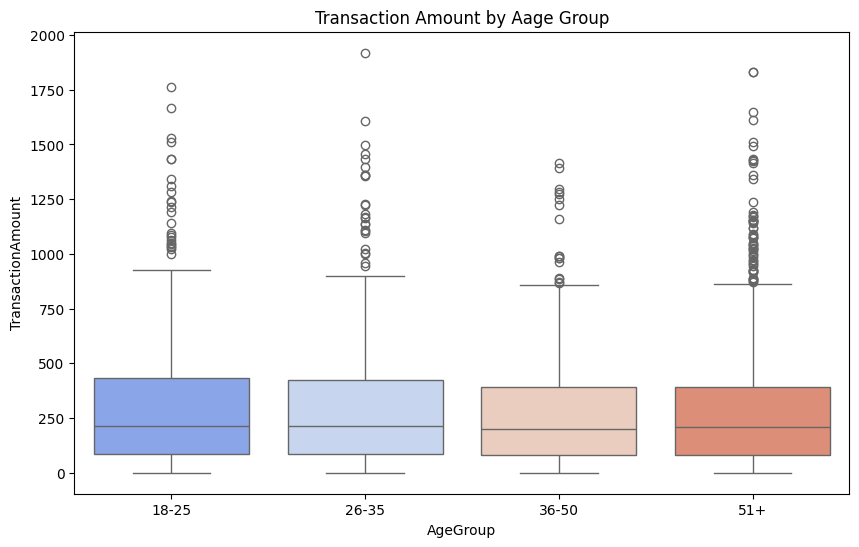

In [9]:
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '51+'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='TransactionAmount', palette='coolwarm')
plt.title("Transaction Amount by Aage Group")
plt.show()

### Daily Transaction Count (Time-based Analysis)

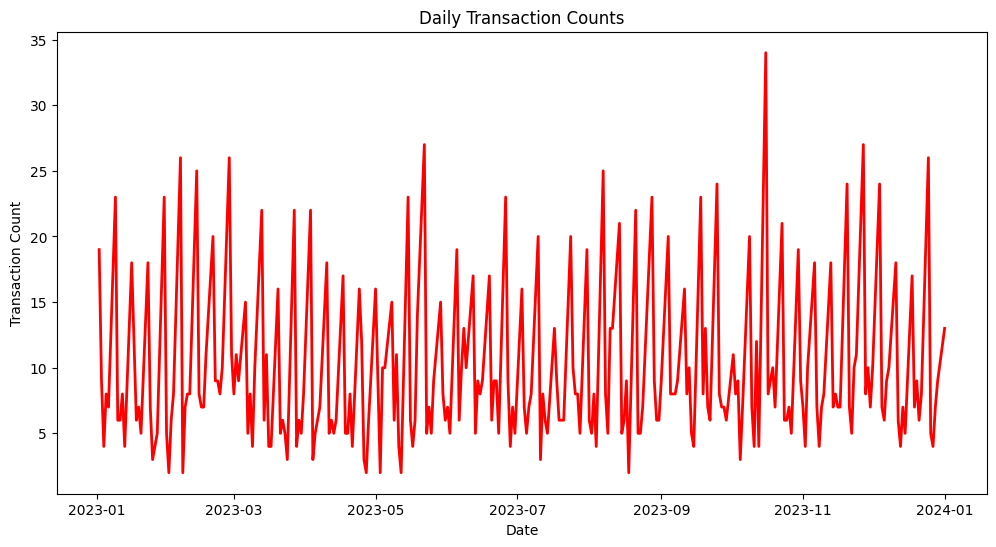

In [10]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionDay'] = df['TransactionDate'].dt.date
daily_counts = df.groupby('TransactionDay').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(title="Daily Transaction Counts", color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.show()

### Transaction Count by Day of the Week

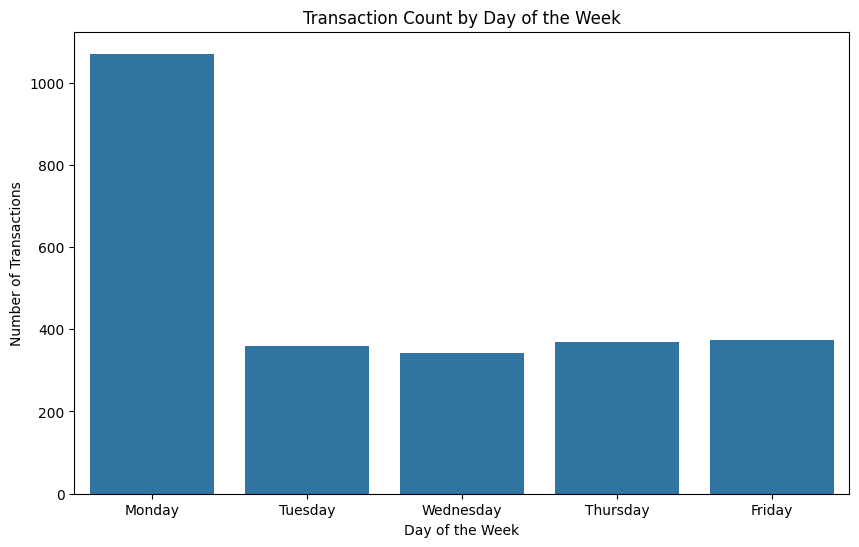

In [11]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract the day of the week
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

# Plot transaction count by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


### Analyzing Transaction Times for Anomalies

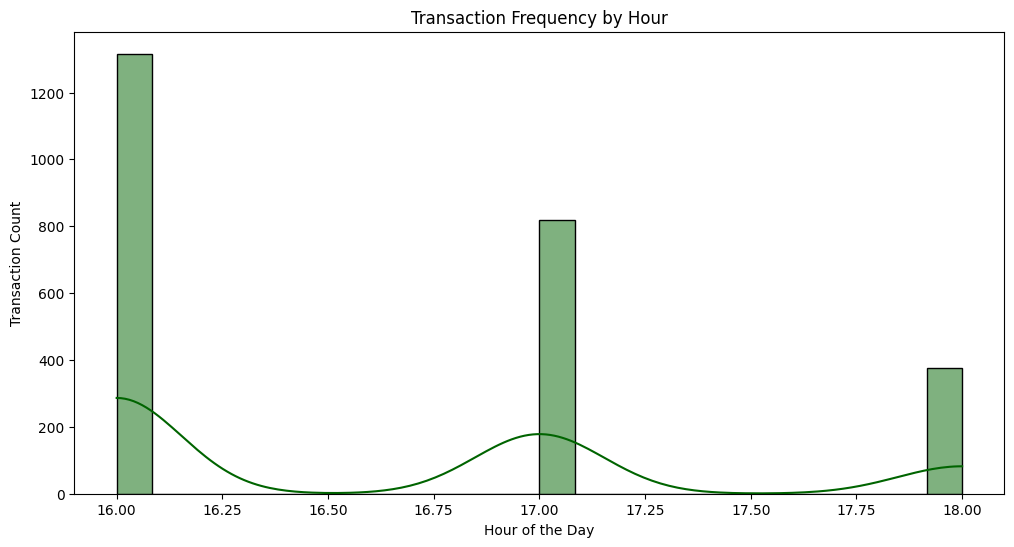

In [12]:
df['Hour'] = df['TransactionDate'].dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Hour', kde=True, bins=24, color='darkgreen')
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.show()

### Top Locations by Transaction Volume

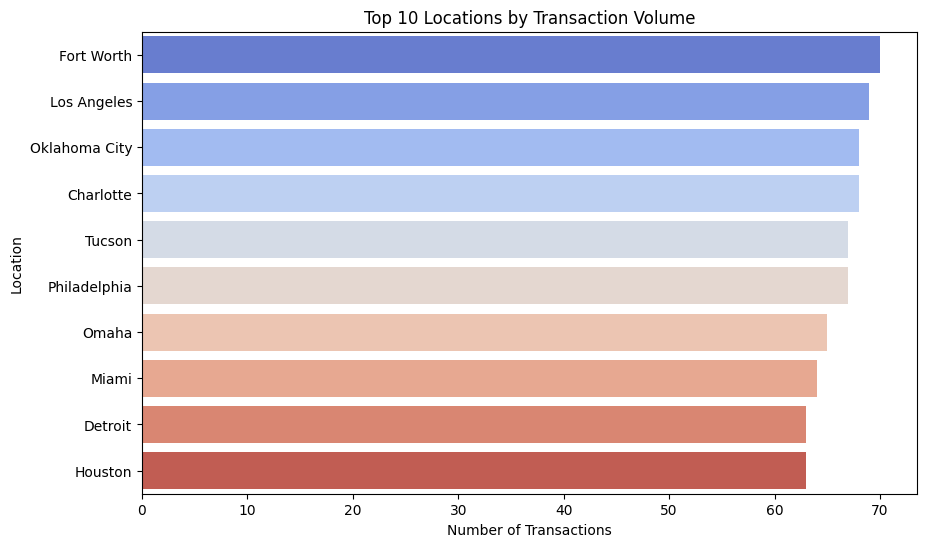

In [13]:
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title('Top 10 Locations by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.show()


### Customer Age Distribution by Transaction Type

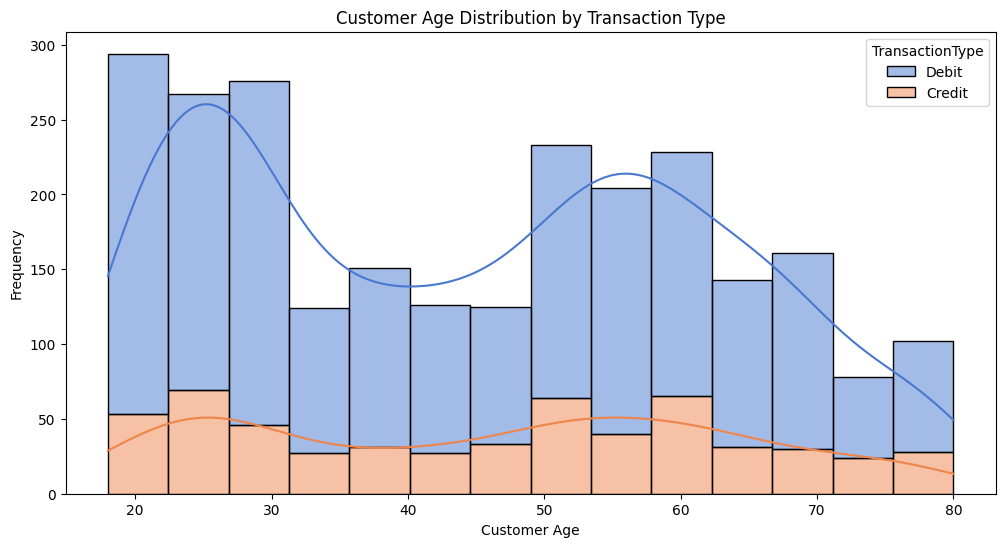

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='muted', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


### Account Balance vs. Transaction Amount

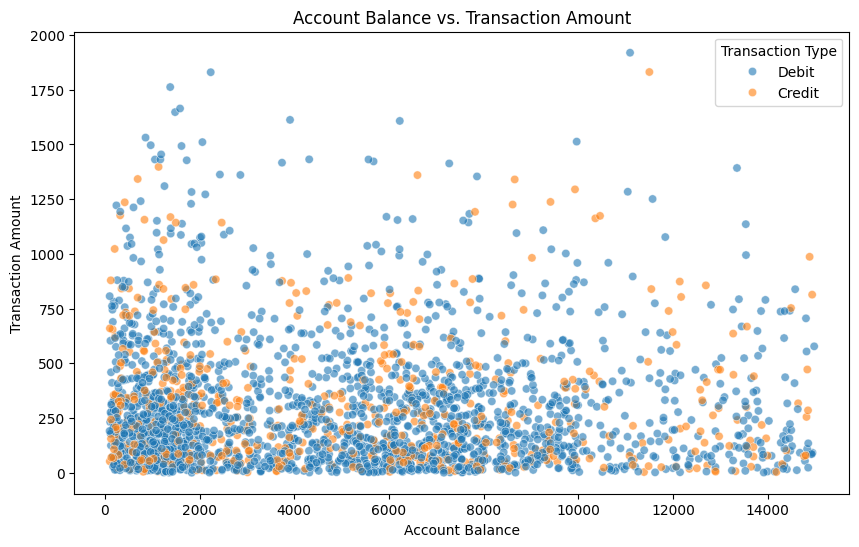

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.6)
plt.title('Account Balance vs. Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()


### Correlation Analysis for Numeric Columns

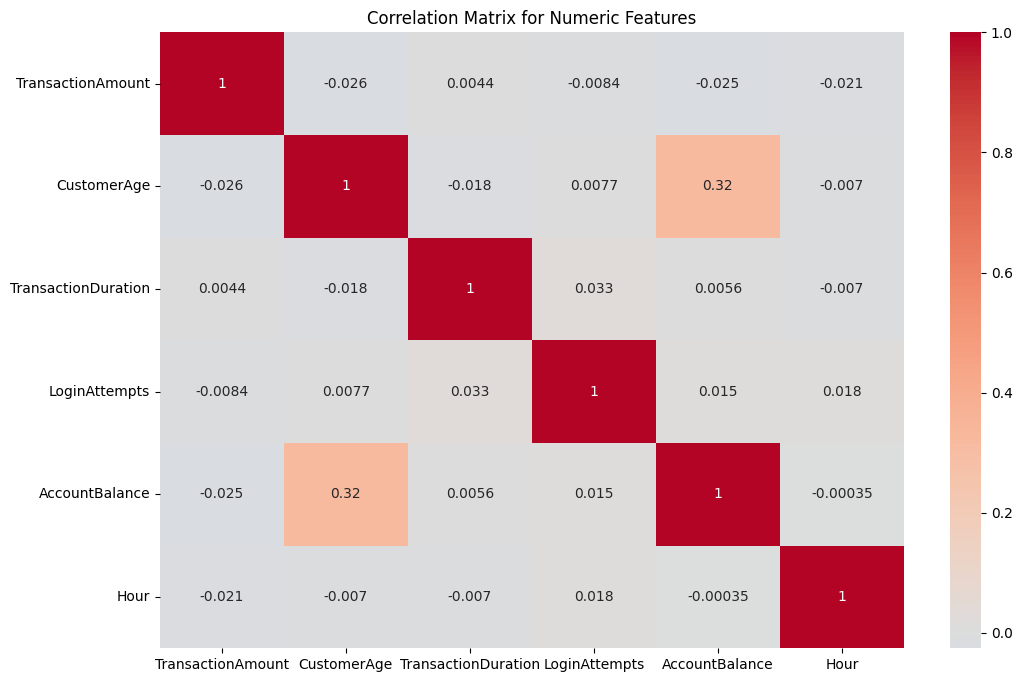

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

### Login Attempts vs. Transaction Amount (Potential Fraud Indicator)

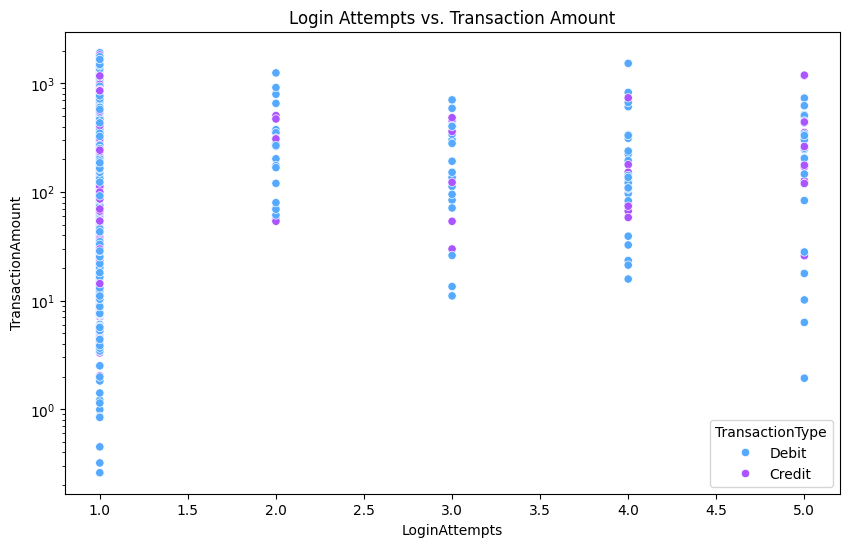

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoginAttempts', y='TransactionAmount', hue='TransactionType', palette='cool')
plt.yscale('log')
plt.title("Login Attempts vs. Transaction Amount")
plt.show()

 ### Time Gap Analysis (Transaction Frequency)

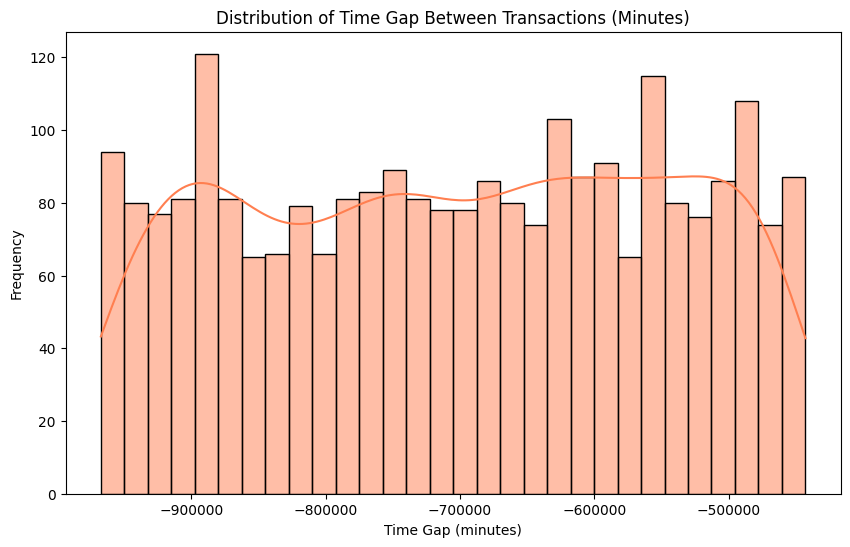

In [18]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['TimeGap'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TimeGap', bins=30, color='coral', kde=True)
plt.title("Distribution of Time Gap Between Transactions (Minutes)")
plt.xlabel("Time Gap (minutes)")
plt.ylabel("Frequency")
plt.show()

### Channel Usage Patterns

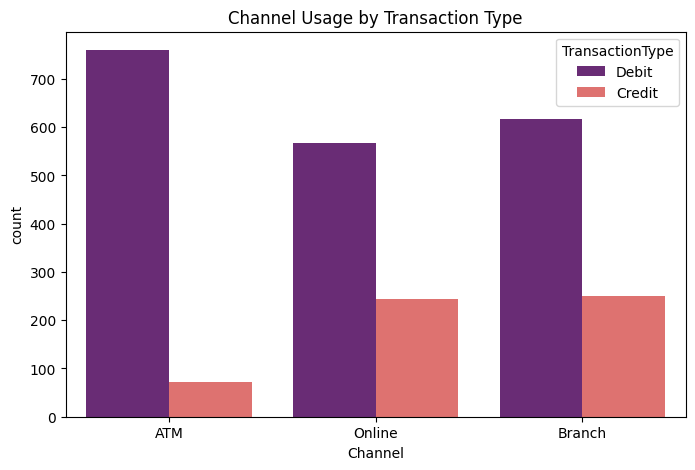

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Channel', hue='TransactionType', palette='magma')
plt.title("Channel Usage by Transaction Type")
plt.show()

### DeviceID and IP Address Variation per Account (Anomaly Detection)

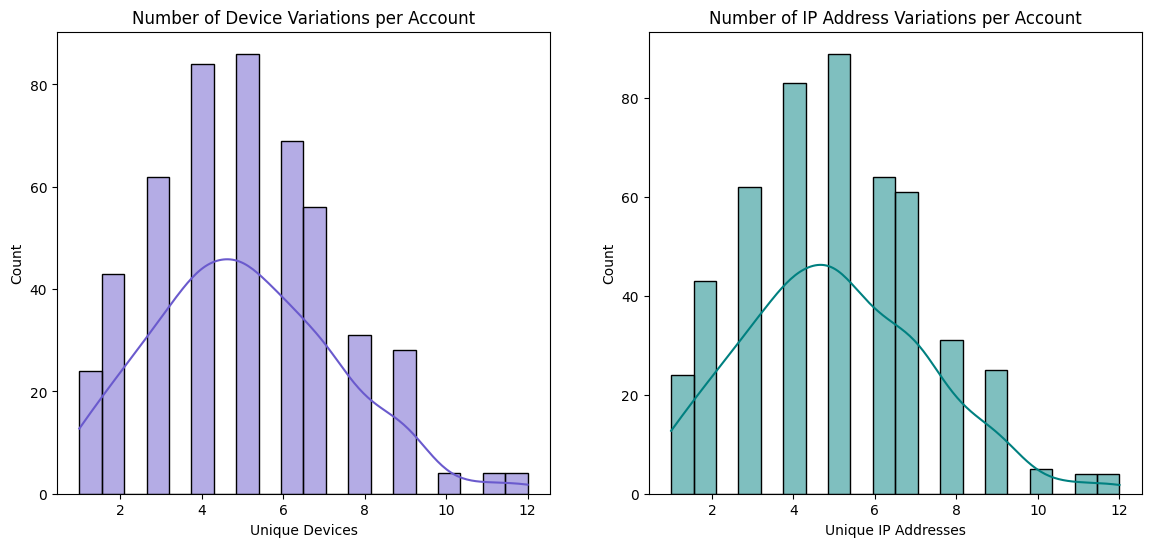

In [20]:
device_variations = df.groupby('AccountID')['DeviceID'].nunique()
ip_variations = df.groupby('AccountID')['IP Address'].nunique()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins=20, color='slateblue', kde=True)
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins=20, color='teal', kde=True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.show()

### Analyze Account Balance vs Transaction Amount

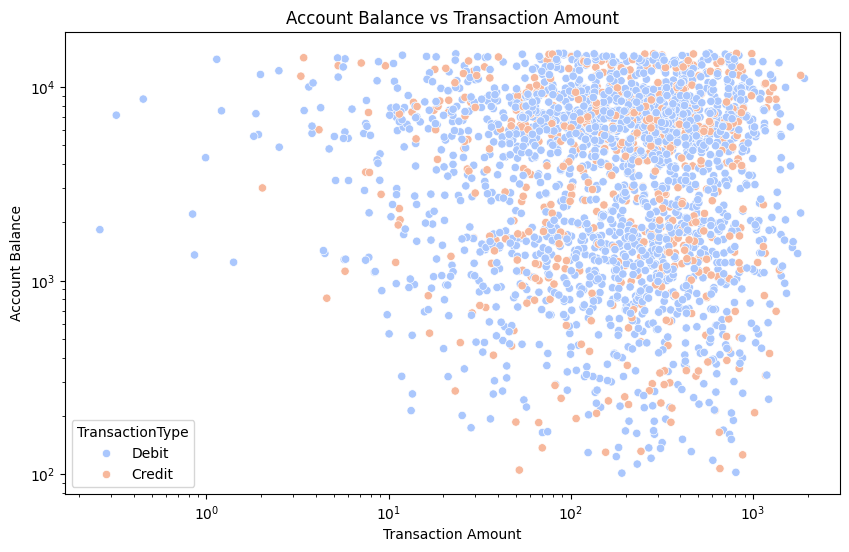

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='TransactionType', palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title("Account Balance vs Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.show()


### Merchant Trends (Most Frequent Merchants)

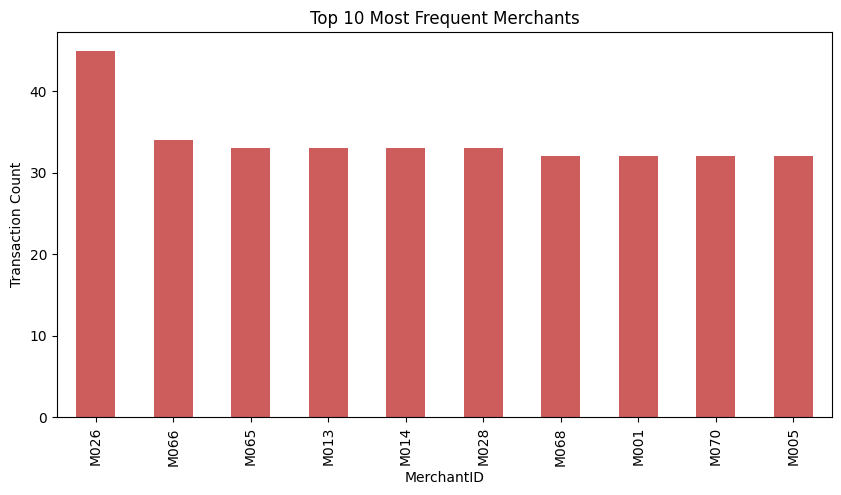

In [22]:
merchant_counts = df['MerchantID'].value_counts().head(10)
plt.figure(figsize=(10, 5))
merchant_counts.plot(kind='bar', color='indianred')
plt.title("Top 10 Most Frequent Merchants")
plt.xlabel("MerchantID")
plt.ylabel("Transaction Count")
plt.show()

### Chi-Square Test of Independence (Categorical Relationship)

In [23]:
contingency_table = pd.crosstab(df['TransactionType'], df['Channel'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("\nChi-Square Test between TransactionType and Channel")
print(f"Chi2 Statistic: {chi2}, p-value: {p}")


Chi-Square Test between TransactionType and Channel
Chi2 Statistic: 136.90539694747218, p-value: 1.8679738038721596e-30


#### The Chi-Square Test of Independence is a statistical test used to determine if there is a significant association between two categorical variables. It helps answer questions like, "Are gender and product preference related?" or "Is transaction type associated with customer location?"

Since the p-value is so low, we can conclude with high confidence that there is a statistically significant association between TransactionType and Channel.

## K-means Clustering

[Documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)

K-means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into K distinct, non-overlapping clusters. The goal is to group similar data points together, with each data point belonging to the cluster with the nearest mean (centroid).


**How it works**

K-means clustering repeatedly assigns data points to the nearest cluster center and then adjusts those centers based on the assigned points, continuing this process until the clusters stabilize. This simple iterative process groups similar data points together effectively.

**Advantages**

K-means clustering is a straightforward and efficient algorithm that can handle large datasets with various data types, making it a versatile tool for grouping similar data points together.

**Use Cases**

K-means clustering has diverse applications, from grouping similar customers and documents to identifying anomalies and preprocessing data for other machine learning tasks. It's a versatile tool used in various fields like marketing, image processing, and information retrieval.

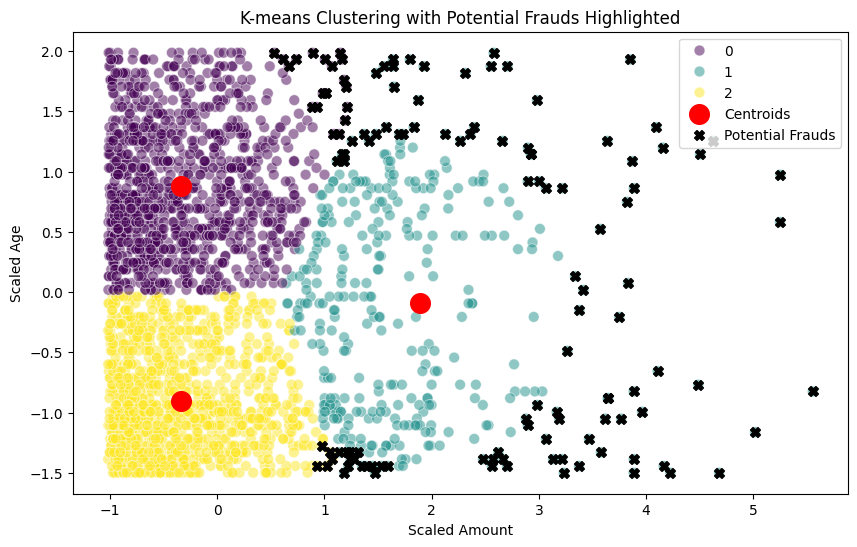

Number of potential frauds detected: 126


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['TransactionAmount', 'CustomerAge']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add labels to the dataset
df['KMeans_Cluster'] = kmeans_labels


# Calculate distance of each point to its assigned cluster centroid
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Define a threshold (e.g., top 5% farthest from centroids)
threshold = np.percentile(distances, 95)  # Change this value as needed

# Flag points above the threshold as potential frauds
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Plot with frauds highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], 
            color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Output the number of frauds detected
print(f"Number of potential frauds detected: {len(frauds)}")


## DBSCAN Clustering on Transactions

[Documentation](https://scikit-learn.org/1.5/modules/generated/dbscan-function.html)

DBSCAN, which stands for **Density-Based Spatial Clustering of Applications with Noise**, is a popular unsupervised machine learning algorithm used for clustering data points. Unlike other clustering algorithms like K-Means, DBSCAN doesn't require you to specify the number of clusters beforehand. Instead, it groups together points that are closely packed together, while marking outliers as noise.

**How it works**

DBSCAN identifies clusters by separating dense regions of data from regions of lower density. It automatically determines the number of clusters based on the data, so it's useful for exploratory data analysis. 

**Advantages**

DBSCAN can find clusters of arbitrary shapes and sizes, and it's robust to noise and outliers. 

**Use Cases**

DBSCAN is useful for data cleaning and outlier detection


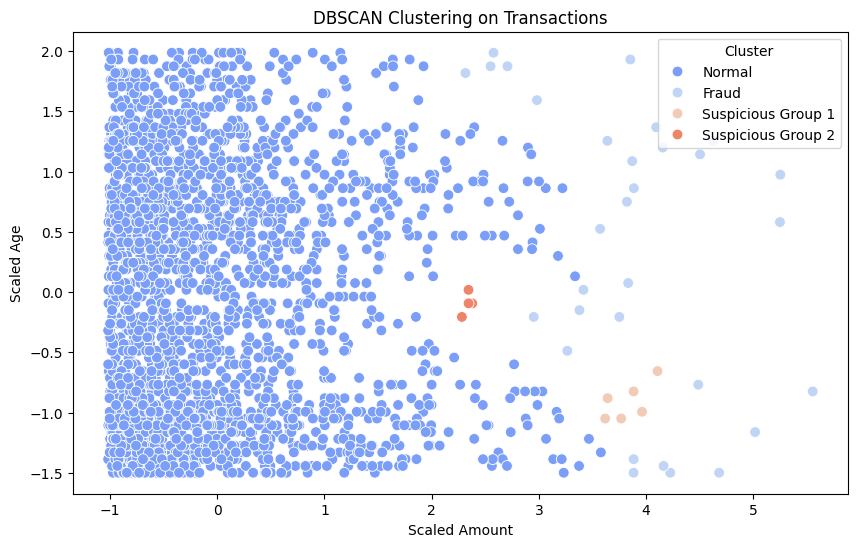

In [25]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted DBSCAN clustering with a refined eps value
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps based on k-distance elbow
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add labels to the dataset
df['DBSCAN_Cluster'] = dbscan_labels

# Map the cluster labels to descriptive names
label_mapping = {-1: 'Fraud', 0: 'Normal', 1: 'Suspicious Group 1', 2: 'Suspicious Group 2'}
df['DBSCAN_Cluster'] = df['DBSCAN_Cluster'].map(label_mapping)

# Plotting with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='coolwarm', s=60)
plt.title('DBSCAN Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()


## Hierarchical Clustering on Transactions
[Documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Hierarchical clustering algorithm that builds a hierarchy of clusters in a bottom-up approach. It starts by considering each data point as a single cluster and then iteratively merges the closest pair of clusters until all data points are in one single cluster.

**How it works**

Hierarchical clustering starts with individual data points as clusters and repeatedly merges the closest pairs until all points form a single cluster, creating a hierarchical tree diagram (dendrogram) that shows the relationships between the clusters.

**Advantages**

Hierarchical clustering offers a flexible and interpretable approach by creating a hierarchy of clusters, visualized through a dendrogram, and allowing for different distance measures to suit various data and applications.

**Use Cases**

Hierarchical clustering is useful for biology for grouping species, social network analysis for identifying communities, document classification for organizing topics, image analysis for segmentation, and market research for understanding customer segments.










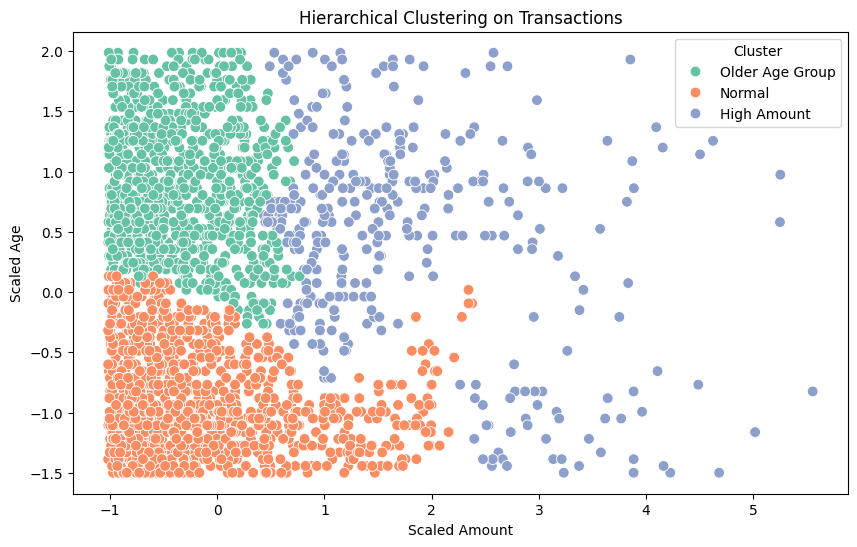

In [26]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add labels to the dataset
df['Hierarchical_Cluster'] = hierarchical_labels

# Mapping the cluster labels to descriptive names
cluster_mapping = {0: 'Normal', 1: 'High Amount', 2: 'Older Age Group'}
df['Hierarchical_Cluster'] = df['Hierarchical_Cluster'].map(cluster_mapping)

# Plot with updated labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Cluster')
plt.show()



## Isolation Forest for Anomaly Detection 
[Documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.IsolationForest.html)

Isolation Forest is an unsupervised machine learning algorithm used for anomaly detection. It isolates anomalies by randomly partitioning the data, exploiting the fact that anomalies are "few and different". This makes them easier to isolate compared to normal instances.   


**How it works**

Isolation Forest isolates anomalies by repeatedly dividing the data randomly until each point is alone, then identifies anomalies as those points that are isolated quickly (with fewer partitions).

**Advantages**

Isolation Forest is a fast and effective anomaly detection algorithm that works well with high-dimensional data and avoids common pitfalls of other methods by accurately identifying anomalies of various types.

**Use Cases**

Isolation Forest is a powerful tool for anomaly detection, particularly when dealing with large, high-dimensional datasets where anomalies are rare and distinct.


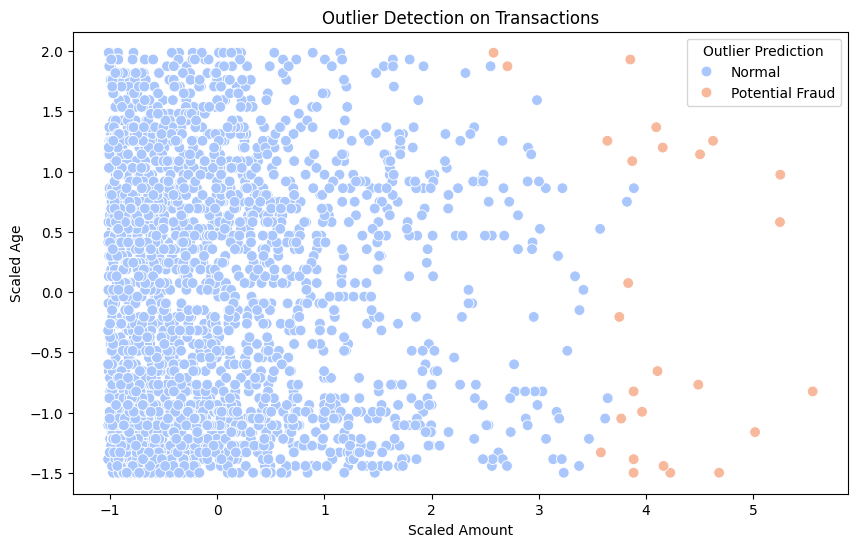

In [27]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to identify anomalies
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate
outlier_pred = iso_forest.fit_predict(X_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
df['Outlier_Prediction'] = pd.Series(outlier_pred).map(outlier_mapping)

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Outlier_Prediction'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()
